# GitHub Routing Benchmarks

These benchmarks compare (1) this router, (2) [Starlette]'s routing and (3) [Falcon]'s routing using GitHub's API, which is a relatively large but not unrealistic routing table.

[Starlette]: https://github.com/encode/starlette
[Falcon]: https://github.com/falconry/falcon

In [1]:
paths = [
    "/app",
    "/app-manifests/{code}/conversions",
    "/app/installations",
    "/app/installations/{installation_id}",
    "/app/installations/{installation_id}/access_tokens",
    "/applications/{client_id}/grants/{access_token}",
    "/applications/{client_id}/tokens/{access_token}",
    "/applications/grants",
    "/applications/grants/{grant_id}",
    "/apps/{app_slug}",
    "/authorizations",
    "/authorizations/{authorization_id}",
    "/authorizations/clients/{client_id}",
    "/authorizations/clients/{client_id}/{fingerprint}",
    "/codes_of_conduct",
    "/codes_of_conduct/{key}",
    "/content_references/{content_reference_id}/attachments",
    "/emojis",
    "/events",
    "/feeds",
    "/gists",
    "/gists/public",
    "/gists/starred",
    "/gists/{gist_id}",
    "/gists/{gist_id}/comments",
    "/gists/{gist_id}/comments/{comment_id}",
    "/gists/{gist_id}/commits",
    "/gists/{gist_id}/forks",
    "/gists/{gist_id}/star",
    "/gists/{gist_id}/{sha}",
    "/gitignore/templates",
    "/gitignore/templates/{name}",
    "/installation/repositories",
    "/issues",
    "/legacy/issues/search/{owner}/{repository}/{state}/{keyword}",
    "/legacy/repos/search/{keyword}",
    "/legacy/user/email/{email}",
    "/legacy/user/search/{keyword}",
    "/licenses",
    "/licenses/{license}",
    "/markdown",
    "/markdown/raw",
    "/marketplace_listing/accounts/{account_id}",
    "/marketplace_listing/plans",
    "/marketplace_listing/plans/{plan_id}/accounts",
    "/marketplace_listing/stubbed/accounts/{account_id}",
    "/marketplace_listing/stubbed/plans",
    "/marketplace_listing/stubbed/plans/{plan_id}/accounts",
    "/meta",
    "/networks/{owner}/{repo}/events",
    "/notifications",
    "/notifications/threads/{thread_id}",
    "/notifications/threads/{thread_id}/subscription",
    "/organizations",
    "/orgs/{org}",
    "/orgs/{org}/blocks",
    "/orgs/{org}/blocks/{username}",
    "/orgs/{org}/events",
    "/orgs/{org}/hooks",
    "/orgs/{org}/hooks/{hook_id}",
    "/orgs/{org}/hooks/{hook_id}/pings",
    "/orgs/{org}/installation",
    "/orgs/{org}/interaction-limits",
    "/orgs/{org}/invitations",
    "/orgs/{org}/invitations/{invitation_id}/teams",
    "/orgs/{org}/issues",
    "/orgs/{org}/members",
    "/orgs/{org}/members/{username}",
    "/orgs/{org}/memberships/{username}",
    "/orgs/{org}/migrations",
    "/orgs/{org}/migrations/{migration_id}",
    "/orgs/{org}/migrations/{migration_id}/archive",
    "/orgs/{org}/migrations/{migration_id}/repos/{repo_name}/lock",
    "/orgs/{org}/outside_collaborators",
    "/orgs/{org}/outside_collaborators/{username}",
    "/orgs/{org}/projects",
    "/orgs/{org}/public_members",
    "/orgs/{org}/public_members/{username}",
    "/orgs/{org}/repos",
    "/orgs/{org}/teams",
    "/projects/{project_id}",
    "/projects/{project_id}/collaborators",
    "/projects/{project_id}/collaborators/{username}",
    "/projects/{project_id}/collaborators/{username}/permission",
    "/projects/{project_id}/columns",
    "/projects/columns/cards/{card_id}",
    "/projects/columns/cards/{card_id}/moves",
    "/projects/columns/{column_id}",
    "/projects/columns/{column_id}/cards",
    "/projects/columns/{column_id}/moves",
    "/rate_limit",
    "/reactions/{reaction_id}",
    "/repos/{owner}/{repo}",
    "/repos/{owner}/{repo}/assignees",
    "/repos/{owner}/{repo}/assignees/{assignee}",
    "/repos/{owner}/{repo}/branches",
    "/repos/{owner}/{repo}/branches/{branch}",
    "/repos/{owner}/{repo}/branches/{branch}/protection",
    "/repos/{owner}/{repo}/branches/{branch}/protection/enforce_admins",
    "/repos/{owner}/{repo}/branches/{branch}/protection/required_pull_request_reviews",
    "/repos/{owner}/{repo}/branches/{branch}/protection/required_signatures",
    "/repos/{owner}/{repo}/branches/{branch}/protection/required_status_checks",
    "/repos/{owner}/{repo}/branches/{branch}/protection/required_status_checks/contexts",
    "/repos/{owner}/{repo}/branches/{branch}/protection/restrictions",
    "/repos/{owner}/{repo}/branches/{branch}/protection/restrictions/teams",
    "/repos/{owner}/{repo}/branches/{branch}/protection/restrictions/users",
    "/repos/{owner}/{repo}/check-runs",
    "/repos/{owner}/{repo}/check-runs/{check_run_id}",
    "/repos/{owner}/{repo}/check-runs/{check_run_id}/annotations",
    "/repos/{owner}/{repo}/check-suites",
    "/repos/{owner}/{repo}/check-suites/preferences",
    "/repos/{owner}/{repo}/check-suites/{check_suite_id}",
    "/repos/{owner}/{repo}/check-suites/{check_suite_id}/check-runs",
    "/repos/{owner}/{repo}/check-suites/{check_suite_id}/rerequest",
    "/repos/{owner}/{repo}/collaborators",
    "/repos/{owner}/{repo}/collaborators/{username}",
    "/repos/{owner}/{repo}/collaborators/{username}/permission",
    "/repos/{owner}/{repo}/comments",
    "/repos/{owner}/{repo}/comments/{comment_id}",
    "/repos/{owner}/{repo}/comments/{comment_id}/reactions",
    "/repos/{owner}/{repo}/commits",
    "/repos/{owner}/{repo}/commits/{ref}",
    "/repos/{owner}/{repo}/commits/{ref}/check-runs",
    "/repos/{owner}/{repo}/commits/{ref}/check-suites",
    "/repos/{owner}/{repo}/commits/{ref}/comments",
    "/repos/{owner}/{repo}/commits/{ref}/status",
    "/repos/{owner}/{repo}/commits/{ref}/statuses",
    "/repos/{owner}/{repo}/community/code_of_conduct",
    "/repos/{owner}/{repo}/community/profile",
    "/repos/{owner}/{repo}/contents/{path}",
    "/repos/{owner}/{repo}/contributors",
    "/repos/{owner}/{repo}/deployments",
    "/repos/{owner}/{repo}/deployments/{deployment_id}",
    "/repos/{owner}/{repo}/deployments/{deployment_id}/statuses",
    "/repos/{owner}/{repo}/deployments/{deployment_id}/statuses/{status_id}",
    "/repos/{owner}/{repo}/downloads",
    "/repos/{owner}/{repo}/downloads/{download_id}",
    "/repos/{owner}/{repo}/events",
    "/repos/{owner}/{repo}/forks",
    "/repos/{owner}/{repo}/git/blobs",
    "/repos/{owner}/{repo}/git/blobs/{file_sha}",
    "/repos/{owner}/{repo}/git/commits",
    "/repos/{owner}/{repo}/git/commits/{commit_sha}",
    "/repos/{owner}/{repo}/git/refs",
    "/repos/{owner}/{repo}/git/refs/{ref}",
    "/repos/{owner}/{repo}/git/tags",
    "/repos/{owner}/{repo}/git/tags/{tag_sha}",
    "/repos/{owner}/{repo}/git/trees",
    "/repos/{owner}/{repo}/git/trees/{tree_sha}",
    "/repos/{owner}/{repo}/hooks",
    "/repos/{owner}/{repo}/hooks/{hook_id}",
    "/repos/{owner}/{repo}/hooks/{hook_id}/pings",
    "/repos/{owner}/{repo}/hooks/{hook_id}/tests",
    "/repos/{owner}/{repo}/import",
    "/repos/{owner}/{repo}/import/authors",
    "/repos/{owner}/{repo}/import/authors/{author_id}",
    "/repos/{owner}/{repo}/import/large_files",
    "/repos/{owner}/{repo}/import/lfs",
    "/repos/{owner}/{repo}/installation",
    "/repos/{owner}/{repo}/interaction-limits",
    "/repos/{owner}/{repo}/invitations",
    "/repos/{owner}/{repo}/invitations/{invitation_id}",
    "/repos/{owner}/{repo}/issues",
    "/repos/{owner}/{repo}/issues/comments",
    "/repos/{owner}/{repo}/issues/comments/{comment_id}",
    "/repos/{owner}/{repo}/issues/comments/{comment_id}/reactions",
    "/repos/{owner}/{repo}/issues/events",
    "/repos/{owner}/{repo}/issues/events/{event_id}",
    "/repos/{owner}/{repo}/issues/{number}",
    "/repos/{owner}/{repo}/issues/{number}/assignees",
    "/repos/{owner}/{repo}/issues/{number}/comments",
    "/repos/{owner}/{repo}/issues/{number}/events",
    "/repos/{owner}/{repo}/issues/{number}/labels",
    "/repos/{owner}/{repo}/issues/{number}/labels/{name}",
    "/repos/{owner}/{repo}/issues/{number}/lock",
    "/repos/{owner}/{repo}/issues/{number}/reactions",
    "/repos/{owner}/{repo}/issues/{number}/timeline",
    "/repos/{owner}/{repo}/keys",
    "/repos/{owner}/{repo}/keys/{key_id}",
    "/repos/{owner}/{repo}/labels",
    "/repos/{owner}/{repo}/labels/{name}",
    "/repos/{owner}/{repo}/languages",
    "/repos/{owner}/{repo}/license",
    "/repos/{owner}/{repo}/merges",
    "/repos/{owner}/{repo}/milestones",
    "/repos/{owner}/{repo}/milestones/{number}",
    "/repos/{owner}/{repo}/milestones/{number}/labels",
    "/repos/{owner}/{repo}/notifications",
    "/repos/{owner}/{repo}/pages",
    "/repos/{owner}/{repo}/pages/builds",
    "/repos/{owner}/{repo}/pages/builds/latest",
    "/repos/{owner}/{repo}/pages/builds/{build_id}",
    "/repos/{owner}/{repo}/projects",
    "/repos/{owner}/{repo}/pulls",
    "/repos/{owner}/{repo}/pulls/comments",
    "/repos/{owner}/{repo}/pulls/comments/{comment_id}",
    "/repos/{owner}/{repo}/pulls/comments/{comment_id}/reactions",
    "/repos/{owner}/{repo}/pulls/{number}",
    "/repos/{owner}/{repo}/pulls/{number}/comments",
    "/repos/{owner}/{repo}/pulls/{number}/commits",
    "/repos/{owner}/{repo}/pulls/{number}/files",
    "/repos/{owner}/{repo}/pulls/{number}/merge",
    "/repos/{owner}/{repo}/pulls/{number}/requested_reviewers",
    "/repos/{owner}/{repo}/pulls/{number}/reviews",
    "/repos/{owner}/{repo}/pulls/{number}/reviews/{review_id}",
    "/repos/{owner}/{repo}/pulls/{number}/reviews/{review_id}/comments",
    "/repos/{owner}/{repo}/pulls/{number}/reviews/{review_id}/dismissals",
    "/repos/{owner}/{repo}/pulls/{number}/reviews/{review_id}/events",
    "/repos/{owner}/{repo}/readme",
    "/repos/{owner}/{repo}/releases",
    "/repos/{owner}/{repo}/releases/assets/{asset_id}",
    "/repos/{owner}/{repo}/releases/latest",
    "/repos/{owner}/{repo}/releases/tags/{tag}",
    "/repos/{owner}/{repo}/releases/{release_id}",
    "/repos/{owner}/{repo}/releases/{release_id}/assets",
    "/repos/{owner}/{repo}/stargazers",
    "/repos/{owner}/{repo}/stats/code_frequency",
    "/repos/{owner}/{repo}/stats/commit_activity",
    "/repos/{owner}/{repo}/stats/contributors",
    "/repos/{owner}/{repo}/stats/participation",
    "/repos/{owner}/{repo}/stats/punch_card",
    "/repos/{owner}/{repo}/statuses/{sha}",
    "/repos/{owner}/{repo}/subscribers",
    "/repos/{owner}/{repo}/subscription",
    "/repos/{owner}/{repo}/tags",
    "/repos/{owner}/{repo}/teams",
    "/repos/{owner}/{repo}/topics",
    "/repos/{owner}/{repo}/traffic/clones",
    "/repos/{owner}/{repo}/traffic/popular/paths",
    "/repos/{owner}/{repo}/traffic/popular/referrers",
    "/repos/{owner}/{repo}/traffic/views",
    "/repos/{owner}/{repo}/transfer",
    "/repos/{owner}/{repo}/{archive_format}/{ref}",
    "/repositories",
    "/scim/v2/organizations/{org}/Users",
    "/scim/v2/organizations/{org}/Users/{external_identity_guid}",
    "/search/code",
    "/search/commits",
    "/search/issues",
    "/search/labels",
    "/search/repositories",
    "/search/topics",
    "/search/users",
    "/teams/{team_id}",
    "/teams/{team_id}/discussions",
    "/teams/{team_id}/discussions/{discussion_number}",
    "/teams/{team_id}/discussions/{discussion_number}/comments",
    "/teams/{team_id}/discussions/{discussion_number}/comments/{comment_number}",
    "/teams/{team_id}/discussions/{discussion_number}/comments/{comment_number}/reactions",
    "/teams/{team_id}/discussions/{discussion_number}/reactions",
    "/teams/{team_id}/invitations",
    "/teams/{team_id}/members",
    "/teams/{team_id}/members/{username}",
    "/teams/{team_id}/memberships/{username}",
    "/teams/{team_id}/projects",
    "/teams/{team_id}/projects/{project_id}",
    "/teams/{team_id}/repos",
    "/teams/{team_id}/repos/{owner}/{repo}",
    "/teams/{team_id}/teams",
    "/user",
    "/user/blocks",
    "/user/blocks/{username}",
    "/user/email/visibility",
    "/user/emails",
    "/user/followers",
    "/user/following",
    "/user/following/{username}",
    "/user/gpg_keys",
    "/user/gpg_keys/{gpg_key_id}",
    "/user/installations",
    "/user/installations/{installation_id}/repositories",
    "/user/installations/{installation_id}/repositories/{repository_id}",
    "/user/issues",
    "/user/keys",
    "/user/keys/{key_id}",
    "/user/marketplace_purchases",
    "/user/marketplace_purchases/stubbed",
    "/user/memberships/orgs",
    "/user/memberships/orgs/{org}",
    "/user/migrations",
    "/user/migrations/{migration_id}",
    "/user/migrations/{migration_id}/archive",
    "/user/migrations/{migration_id}/repos/{repo_name}/lock",
    "/user/orgs",
    "/user/projects",
    "/user/public_emails",
    "/user/repos",
    "/user/repository_invitations",
    "/user/repository_invitations/{invitation_id}",
    "/user/starred",
    "/user/starred/{owner}/{repo}",
    "/user/subscriptions",
    "/user/subscriptions/{owner}/{repo}",
    "/user/teams",
    "/users",
    "/users/{username}",
    "/users/{username}/events",
    "/users/{username}/events/orgs/{org}",
    "/users/{username}/events/public",
    "/users/{username}/followers",
    "/users/{username}/following",
    "/users/{username}/following/{target_user}",
    "/users/{username}/gists",
    "/users/{username}/gpg_keys",
    "/users/{username}/hovercard",
    "/users/{username}/installation",
    "/users/{username}/keys",
    "/users/{username}/orgs",
    "/users/{username}/projects",
    "/users/{username}/received_events",
    "/users/{username}/received_events/public",
    "/users/{username}/repos",
    "/users/{username}/starred",
    "/users/{username}/subscriptions",
    "/{url}",
]

urls = [
    "/app",
    "/app-manifests/0/conversions",
    "/app/installations",
    "/app/installations/12345",
    "/app/installations/12345/access_tokens",
    "/applications/67890/grants/777cc25bacbd7cd4f4ddd631006a998fa74b5ed3",
    "/applications/67890/tokens/777cc25bacbd7cd4f4ddd631006a998fa74b5ed3",
    "/applications/grants",
    "/applications/grants/1",
    "/apps/rust-lang",
    "/authorizations",
    "/authorizations/144",
    "/authorizations/clients/67890",
    "/authorizations/clients/67890/233",
    "/codes_of_conduct",
    "/codes_of_conduct/377",
    "/content_references/610/attachments",
    "/emojis",
    "/events",
    "/feeds",
    "/gists",
    "/gists/public",
    "/gists/starred",
    "/gists/7c220d4d6d95b389816bc9d3fbb7a5d4",
    "/gists/7c220d4d6d95b389816bc9d3fbb7a5d4/comments",
    "/gists/7c220d4d6d95b389816bc9d3fbb7a5d4/comments/2274119",
    "/gists/7c220d4d6d95b389816bc9d3fbb7a5d4/commits",
    "/gists/7c220d4d6d95b389816bc9d3fbb7a5d4/forks",
    "/gists/7c220d4d6d95b389816bc9d3fbb7a5d4/star",
    "/gists/7c220d4d6d95b389816bc9d3fbb7a5d4/2aa4c46cfdd726e97360c2734835aa3515e8c858",
    "/gitignore/templates",
    "/gitignore/templates/rust",
    "/installation/repositories",
    "/issues",
    "/legacy/issues/search/rust-lang/rust/987/1597",
    "/legacy/repos/search/1597",
    "/legacy/user/email/rust@rust-lang.org",
    "/legacy/user/search/1597",
    "/licenses",
    "/licenses/mit",
    "/markdown",
    "/markdown/raw",
    "/marketplace_listing/accounts/rust-lang",
    "/marketplace_listing/plans",
    "/marketplace_listing/plans/987/accounts",
    "/marketplace_listing/stubbed/accounts/rust-lang",
    "/marketplace_listing/stubbed/plans",
    "/marketplace_listing/stubbed/plans/987/accounts",
    "/meta",
    "/networks/rust-lang/rust/events",
    "/notifications",
    "/notifications/threads/233",
    "/notifications/threads/233/subscription",
    "/organizations",
    "/orgs/rust-lang",
    "/orgs/rust-lang/blocks",
    "/orgs/rust-lang/blocks/alexcrichton",
    "/orgs/rust-lang/events",
    "/orgs/rust-lang/hooks",
    "/orgs/rust-lang/hooks/1357908642",
    "/orgs/rust-lang/hooks/1357908642/pings",
    "/orgs/rust-lang/installation",
    "/orgs/rust-lang/interaction-limits",
    "/orgs/rust-lang/invitations",
    "/orgs/rust-lang/invitations/c9f8304351ad4223e4f618e9a329b2b94776b25e/teams",
    "/orgs/rust-lang/issues",
    "/orgs/rust-lang/members",
    "/orgs/rust-lang/members/alexcrichton",
    "/orgs/rust-lang/memberships/alexcrichton",
    "/orgs/rust-lang/migrations",
    "/orgs/rust-lang/migrations/233",
    "/orgs/rust-lang/migrations/233/archive",
    "/orgs/rust-lang/migrations/233/repos/rust/lock",
    "/orgs/rust-lang/outside_collaborators",
    "/orgs/rust-lang/outside_collaborators/alexcrichton",
    "/orgs/rust-lang/projects",
    "/orgs/rust-lang/public_members",
    "/orgs/rust-lang/public_members/alexcrichton",
    "/orgs/rust-lang/repos",
    "/orgs/rust-lang/teams",
    "/projects/13",
    "/projects/13/collaborators",
    "/projects/13/collaborators/alexcrichton",
    "/projects/13/collaborators/alexcrichton/permission",
    "/projects/13/columns",
    "/projects/columns/cards/16266729",
    "/projects/columns/cards/16266729/moves",
    "/projects/columns/3953507",
    "/projects/columns/3953507/cards",
    "/projects/columns/3953507/moves",
    "/rate_limit",
    "/reactions/3",
    "/repos/rust-lang/rust",
    "/repos/rust-lang/rust/assignees",
    "/repos/rust-lang/rust/assignees/rust",
    "/repos/rust-lang/rust/branches",
    "/repos/rust-lang/rust/branches/master",
    "/repos/rust-lang/rust/branches/master/protection",
    "/repos/rust-lang/rust/branches/master/protection/enforce_admins",
    "/repos/rust-lang/rust/branches/master/protection/required_pull_request_reviews",
    "/repos/rust-lang/rust/branches/master/protection/required_signatures",
    "/repos/rust-lang/rust/branches/master/protection/required_status_checks",
    "/repos/rust-lang/rust/branches/master/protection/required_status_checks/contexts",
    "/repos/rust-lang/rust/branches/master/protection/restrictions",
    "/repos/rust-lang/rust/branches/master/protection/restrictions/teams",
    "/repos/rust-lang/rust/branches/master/protection/restrictions/users",
    "/repos/rust-lang/rust/check-runs",
    "/repos/rust-lang/rust/check-runs/987",
    "/repos/rust-lang/rust/check-runs/987/annotations",
    "/repos/rust-lang/rust/check-suites",
    "/repos/rust-lang/rust/check-suites/preferences",
    "/repos/rust-lang/rust/check-suites/610",
    "/repos/rust-lang/rust/check-suites/610/check-runs",
    "/repos/rust-lang/rust/check-suites/610/rerequest",
    "/repos/rust-lang/rust/collaborators",
    "/repos/rust-lang/rust/collaborators/alexcrichton",
    "/repos/rust-lang/rust/collaborators/alexcrichton/permission",
    "/repos/rust-lang/rust/comments",
    "/repos/rust-lang/rust/comments/2274119",
    "/repos/rust-lang/rust/comments/2274119/reactions",
    "/repos/rust-lang/rust/commits",
    "/repos/rust-lang/rust/commits/2aa4c46cfdd726e97360c2734835aa3515e8c858",
    "/repos/rust-lang/rust/commits/2aa4c46cfdd726e97360c2734835aa3515e8c858/check-runs",
    "/repos/rust-lang/rust/commits/2aa4c46cfdd726e97360c2734835aa3515e8c858/check-suites",
    "/repos/rust-lang/rust/commits/2aa4c46cfdd726e97360c2734835aa3515e8c858/comments",
    "/repos/rust-lang/rust/commits/2aa4c46cfdd726e97360c2734835aa3515e8c858/status",
    "/repos/rust-lang/rust/commits/2aa4c46cfdd726e97360c2734835aa3515e8c858/statuses",
    "/repos/rust-lang/rust/community/code_of_conduct",
    "/repos/rust-lang/rust/community/profile",
    "/repos/rust-lang/rust/contents/rust",
    "/repos/rust-lang/rust/contributors",
    "/repos/rust-lang/rust/deployments",
    "/repos/rust-lang/rust/deployments/610",
    "/repos/rust-lang/rust/deployments/610/statuses",
    "/repos/rust-lang/rust/deployments/610/statuses/2",
    "/repos/rust-lang/rust/downloads",
    "/repos/rust-lang/rust/downloads/1",
    "/repos/rust-lang/rust/events",
    "/repos/rust-lang/rust/forks",
    "/repos/rust-lang/rust/git/blobs",
    "/repos/rust-lang/rust/git/blobs/a1b2c3d4e5",
    "/repos/rust-lang/rust/git/commits",
    "/repos/rust-lang/rust/git/commits/a1b2c3d4e5",
    "/repos/rust-lang/rust/git/refs",
    "/repos/rust-lang/rust/git/refs/2aa4c46cfdd726e97360c2734835aa3515e8c858",
    "/repos/rust-lang/rust/git/tags",
    "/repos/rust-lang/rust/git/tags/v1.33.0",
    "/repos/rust-lang/rust/git/trees",
    "/repos/rust-lang/rust/git/trees/a1b2c3d4e5",
    "/repos/rust-lang/rust/hooks",
    "/repos/rust-lang/rust/hooks/1357908642",
    "/repos/rust-lang/rust/hooks/1357908642/pings",
    "/repos/rust-lang/rust/hooks/1357908642/tests",
    "/repos/rust-lang/rust/import",
    "/repos/rust-lang/rust/import/authors",
    "/repos/rust-lang/rust/import/authors/rust",
    "/repos/rust-lang/rust/import/large_files",
    "/repos/rust-lang/rust/import/lfs",
    "/repos/rust-lang/rust/installation",
    "/repos/rust-lang/rust/interaction-limits",
    "/repos/rust-lang/rust/invitations",
    "/repos/rust-lang/rust/invitations/c9f8304351ad4223e4f618e9a329b2b94776b25e",
    "/repos/rust-lang/rust/issues",
    "/repos/rust-lang/rust/issues/comments",
    "/repos/rust-lang/rust/issues/comments/2274119",
    "/repos/rust-lang/rust/issues/comments/2274119/reactions",
    "/repos/rust-lang/rust/issues/events",
    "/repos/rust-lang/rust/issues/events/97531",
    "/repos/rust-lang/rust/issues/59040",
    "/repos/rust-lang/rust/issues/59040/assignees",
    "/repos/rust-lang/rust/issues/59040/comments",
    "/repos/rust-lang/rust/issues/59040/events",
    "/repos/rust-lang/rust/issues/59040/labels",
    "/repos/rust-lang/rust/issues/59040/labels/rust",
    "/repos/rust-lang/rust/issues/59040/lock",
    "/repos/rust-lang/rust/issues/59040/reactions",
    "/repos/rust-lang/rust/issues/59040/timeline",
    "/repos/rust-lang/rust/keys",
    "/repos/rust-lang/rust/keys/asnyc-await",
    "/repos/rust-lang/rust/labels",
    "/repos/rust-lang/rust/labels/rust",
    "/repos/rust-lang/rust/languages",
    "/repos/rust-lang/rust/license",
    "/repos/rust-lang/rust/merges",
    "/repos/rust-lang/rust/milestones",
    "/repos/rust-lang/rust/milestones/59040",
    "/repos/rust-lang/rust/milestones/59040/labels",
    "/repos/rust-lang/rust/notifications",
    "/repos/rust-lang/rust/pages",
    "/repos/rust-lang/rust/pages/builds",
    "/repos/rust-lang/rust/pages/builds/latest",
    "/repos/rust-lang/rust/pages/builds/233",
    "/repos/rust-lang/rust/projects",
    "/repos/rust-lang/rust/pulls",
    "/repos/rust-lang/rust/pulls/comments",
    "/repos/rust-lang/rust/pulls/comments/2274119",
    "/repos/rust-lang/rust/pulls/comments/2274119/reactions",
    "/repos/rust-lang/rust/pulls/59040",
    "/repos/rust-lang/rust/pulls/59040/comments",
    "/repos/rust-lang/rust/pulls/59040/commits",
    "/repos/rust-lang/rust/pulls/59040/files",
    "/repos/rust-lang/rust/pulls/59040/merge",
    "/repos/rust-lang/rust/pulls/59040/requested_reviewers",
    "/repos/rust-lang/rust/pulls/59040/reviews",
    "/repos/rust-lang/rust/pulls/59040/reviews/377",
    "/repos/rust-lang/rust/pulls/59040/reviews/377/comments",
    "/repos/rust-lang/rust/pulls/59040/reviews/377/dismissals",
    "/repos/rust-lang/rust/pulls/59040/reviews/377/events",
    "/repos/rust-lang/rust/readme",
    "/repos/rust-lang/rust/releases",
    "/repos/rust-lang/rust/releases/assets/987",
    "/repos/rust-lang/rust/releases/latest",
    "/repos/rust-lang/rust/releases/tags/v1.33.0",
    "/repos/rust-lang/rust/releases/610",
    "/repos/rust-lang/rust/releases/610/assets",
    "/repos/rust-lang/rust/stargazers",
    "/repos/rust-lang/rust/stats/code_frequency",
    "/repos/rust-lang/rust/stats/commit_activity",
    "/repos/rust-lang/rust/stats/contributors",
    "/repos/rust-lang/rust/stats/participation",
    "/repos/rust-lang/rust/stats/punch_card",
    "/repos/rust-lang/rust/statuses/2aa4c46cfdd726e97360c2734835aa3515e8c858",
    "/repos/rust-lang/rust/subscribers",
    "/repos/rust-lang/rust/subscription",
    "/repos/rust-lang/rust/tags",
    "/repos/rust-lang/rust/teams",
    "/repos/rust-lang/rust/topics",
    "/repos/rust-lang/rust/traffic/clones",
    "/repos/rust-lang/rust/traffic/popular/paths",
    "/repos/rust-lang/rust/traffic/popular/referrers",
    "/repos/rust-lang/rust/traffic/views",
    "/repos/rust-lang/rust/transfer",
    "/repos/rust-lang/rust/gzip/2aa4c46cfdd726e97360c2734835aa3515e8c858",
    "/repositories",
    "/scim/v2/organizations/rust-lang/Users",
    "/scim/v2/organizations/rust-lang/Users/admin",
    "/search/code",
    "/search/commits",
    "/search/issues",
    "/search/labels",
    "/search/repositories",
    "/search/topics",
    "/search/users",
    "/teams/987654321",
    "/teams/987654321/discussions",
    "/teams/987654321/discussions/13579",
    "/teams/987654321/discussions/13579/comments",
    "/teams/987654321/discussions/13579/comments/24680",
    "/teams/987654321/discussions/13579/comments/24680/reactions",
    "/teams/987654321/discussions/13579/reactions",
    "/teams/987654321/invitations",
    "/teams/987654321/members",
    "/teams/987654321/members/alexcrichton",
    "/teams/987654321/memberships/alexcrichton",
    "/teams/987654321/projects",
    "/teams/987654321/projects/13",
    "/teams/987654321/repos",
    "/teams/987654321/repos/rust-lang/rust",
    "/teams/987654321/teams",
    "/user",
    "/user/blocks",
    "/user/blocks/alexcrichton",
    "/user/email/visibility",
    "/user/emails",
    "/user/followers",
    "/user/following",
    "/user/following/alexcrichton",
    "/user/gpg_keys",
    "/user/gpg_keys/abcde12345",
    "/user/installations",
    "/user/installations/12345/repositories",
    "/user/installations/12345/repositories/rust_id",
    "/user/issues",
    "/user/keys",
    "/user/keys/asnyc-await",
    "/user/marketplace_purchases",
    "/user/marketplace_purchases/stubbed",
    "/user/memberships/orgs",
    "/user/memberships/orgs/rust-lang",
    "/user/migrations",
    "/user/migrations/233",
    "/user/migrations/233/archive",
    "/user/migrations/233/repos/rust/lock",
    "/user/orgs",
    "/user/projects",
    "/user/public_emails",
    "/user/repos",
    "/user/repository_invitations",
    "/user/repository_invitations/c9f8304351ad4223e4f618e9a329b2b94776b25e",
    "/user/starred",
    "/user/starred/rust-lang/rust",
    "/user/subscriptions",
    "/user/subscriptions/rust-lang/rust",
    "/user/teams",
    "/users",
    "/users/alexcrichton",
    "/users/alexcrichton/events",
    "/users/alexcrichton/events/orgs/rust-lang",
    "/users/alexcrichton/events/public",
    "/users/alexcrichton/followers",
    "/users/alexcrichton/following",
    "/users/alexcrichton/following/aturon",
    "/users/alexcrichton/gists",
    "/users/alexcrichton/gpg_keys",
    "/users/alexcrichton/hovercard",
    "/users/alexcrichton/installation",
    "/users/alexcrichton/keys",
    "/users/alexcrichton/orgs",
    "/users/alexcrichton/projects",
    "/users/alexcrichton/received_events",
    "/users/alexcrichton/received_events/public",
    "/users/alexcrichton/repos",
    "/users/alexcrichton/starred",
    "/users/alexcrichton/subscriptions",
    "/rust-lang",
]

assert len(paths) == len(urls), (len(paths), len(urls))

In [2]:
from typing import Any

from falcon import Request as FalconRequest, Response as FalconResponse, HTTP_200
from falcon.asgi import App as FalconApp
import starlette.routing as starlette_routing
from starlette.responses import Response as StarletteResponse
from starlette.types import ASGIApp, Scope, Receive, Send, Message

import asgi_routing

def build_assertive_asgi_app(raw_path: str) -> ASGIApp:
    resp = StarletteResponse(b"ok")
    # use a class so that Starlette treats it as an ASGI app
    class App:
        async def __call__(self, scope: Scope, receive: Receive, send: Send) -> None:
            got = scope["raw_path"].decode()
            assert got == raw_path, (got, raw_path)
            await resp(scope, receive, send)
    return App()


class FalconRoute:
    def __init__(self, raw_path: str) -> None:
        self.raw_path = raw_path

    async def on_get(self, request: FalconRequest, response: FalconResponse, **params: Any) -> None:
        got: str = request.path  # type: ignore
        assert got == self.raw_path, (got, self.raw_path)
        response.status = HTTP_200
        response.text = "ok"


def build_assertive_falcon_resource(raw_path: str) -> Any:
    return FalconRoute(raw_path)


def build_asgi_routing_router(n: int) -> ASGIApp:
    return asgi_routing.Router(
        [
            asgi_routing.Route(template, build_assertive_asgi_app(raw_path))
            for template, raw_path in zip(paths[:n], urls[:n])
        ]
    )


def build_starlette_router(n: int) -> ASGIApp:
    return starlette_routing.Router(
        [
            starlette_routing.Route(template, build_assertive_asgi_app(raw_path))
            for template, raw_path in zip(paths[:n], urls[:n])
        ]
    )


def build_falcon_router(n: int) -> ASGIApp:
    app = FalconApp()
    for template, raw_path in zip(paths[:n], urls[:n]):
        resource = build_assertive_falcon_resource(raw_path)
        app.add_route(template, resource)  # type: ignore
    return app


In [3]:
from typing import Callable
from timeit import default_timer

async def benchmark(router_factory: Callable[[int], ASGIApp]) -> tuple[list[int], list[list[float]]]:
    async def send(message: Message) -> None:
        if message["type"] == "http.response.start":
            assert message["status"] == 200, message

    async def receive() -> Message:
        return {
            "type": "http.request",
            "body": b"",
        }

    headers: "list[tuple[bytes, bytes]]" = []
    scope = {
        "type": "http",
        "http_version": "1.1",
        "method": "GET",
        "scheme": "http",
        "query_string": b"",
        "headers": headers,
    }

    t: list[int] = []
    f: list[list[float]] = []

    for n_routes in range(len(urls)):
        router = router_factory(n_routes)
        run: list[float] = []
        for _ in range(100):
            t_total = 0
            for url in urls[:n_routes]:
                scope_with_path = scope.copy()
                scope_with_path["path"] = url
                scope_with_path["raw_path"] = url.encode()
                start = default_timer()
                await router(scope_with_path, receive, send)
                t_total += (default_timer()-start)
            run.append(t_total)
        t.append(n_routes)
        f.append(run)

    return t, f

In [4]:
t_falcon, f_falcon = await benchmark(build_falcon_router)
t_starlette, f_starlette = await benchmark(build_starlette_router)
t_asgi_routing, f_asgi_routing = await benchmark(build_asgi_routing_router)

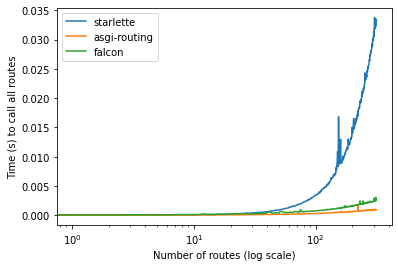

In [5]:
from statistics import mean
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.set_xscale('log')
ax.plot(t_starlette, [mean(g) for g in f_starlette], label="starlette")
ax.plot(t_asgi_routing, [mean(g) for g in f_asgi_routing], label="asgi-routing")
ax.plot(t_falcon, [mean(g) for g in f_falcon], label="falcon")
plt.xlabel("Number of routes (log scale)")
plt.ylabel("Time (s) to call all routes")
plt.legend()
fig.set_facecolor("white")
plt.show()